# Imports

In [1]:
import numpy as np
import data
from kmeans import KmeansClustering
from evaluator import Evaluator
from plotter import Plotter
from spectral_clustering import SpectralClustering
from utilities import *
from dbscan import DBSCAN

# Reading Data

In [2]:
dataLoader = data.DataLoader()

pure_dataset = dataLoader.get_pure_data()
solution_a_dataset = dataLoader.get_modified_data_solution_a()
solution_b_dataset_before_projection = dataLoader._get_modified_data_solution_b_before_projection()
solution_b_dataset = dataLoader.get_modified_data_solution_b()
x_train, y_train, x_test, y_test = dataLoader.get_splitted_data(solution_a=True)
x_train2, y_train2, x_test2, y_test2 = dataLoader.get_splitted_data(solution_a=False)

print(f"Pure Dataset Dims:                           {pure_dataset.shape}")
print(f"Solution A Dataset Dims:                     {solution_a_dataset.shape}")
print(f"Solution B (before projection) Dataset Dims: {solution_b_dataset_before_projection.shape}")
print(f"Solution B (after projection) Dataset Dims:  {solution_b_dataset.shape}\n")
print(f"Train and Test Splits (solution A) Dims:  \n"
      f"\tx_train.shape =              {x_train.shape}\n"
      f"\ty_train.shape =              {y_train.shape}\n"
      f"\tx_test.shape =               {x_test.shape}\n"
      f"\ty_test.shape =               {y_test.shape}\n")
print(f"Train and Test Splits (solution B) Dims:  \n"
      f"\tx_train.shape =              {x_train2.shape}\n"
      f"\ty_train.shape =              {y_train2.shape}\n"
      f"\tx_test.shape =               {x_test2.shape}\n"
      f"\ty_test.shape =               {y_test2.shape}\n")

Pure Dataset Dims:                           (9120, 125, 45)
Solution A Dataset Dims:                     (9120, 45)
Solution B (before projection) Dataset Dims: (9120, 5625)
Solution B (after projection) Dataset Dims:  (9120, 654)

Train and Test Splits (solution A) Dims:  
	x_train.shape =              (7296, 45)
	y_train.shape =              (7296,)
	x_test.shape =               (1824, 45)
	y_test.shape =               (1824,)

Train and Test Splits (solution B) Dims:  
	x_train.shape =              (7296, 654)
	y_train.shape =              (7296,)
	x_test.shape =               (1824, 654)
	y_test.shape =               (1824,)


# Preparing Analysis Objects

In [3]:
evaluators = []
evaluators_names = []

# Kmeans

In this notebook, we will implement the K-means clustering algorithm to solve a specific problem. The problem statement requires us to change the number of clusters (K) in the algorithm and compare the results for different K values. K-means is a popular unsupervised machine learning algorithm used for clustering similar data points into groups. It works by iteratively assigning data points to K clusters based on the mean of the data points in each cluster, and then updating the cluster centroids until convergence.

In our implementation, we will change the value of K to {8, 13, 19, 28, 38} clusters and generate different clusters for each value of K. We will then compare the clusters generated for different K values to understand how the choice of K affects the clustering results. This comparison will help us evaluate the performance of the K-means algorithm for different numbers of clusters and determine the optimal number of clusters for our problem.

<div style="text-align:center;">
 
![KMeans Algorithm Pseudocode](images/kmeans_pseudo.png)
 
</div>

In [4]:
k_values = np.array([8, 13, 19, 28, 38])

solution_a_results_train = np.zeros((len(k_values), 5))
solution_a_results_test = np.zeros((len(k_values), 5))

solution_b_results_train = np.zeros((len(k_values), 5))
solution_b_results_test = np.zeros((len(k_values), 5))

## Solution A of data (Mean of features)

In [5]:
for i in range(len(k_values)):
      kmeans = KmeansClustering(k_values[i])
      kmeans.fit(x_train)
      
      clusters_train_data = kmeans.predict(x_train)
      evaluator_train = Evaluator(y_train, clusters_train_data)
      
      solution_a_results_train[i, 0] = evaluator_train.compute_precision()
      solution_a_results_train[i, 1] = evaluator_train.compute_recall()
      solution_a_results_train[i, 2] = evaluator_train.compute_f1()
      solution_a_results_train[i, 3] = evaluator_train.compute_conditional_entropy()
      solution_a_results_train[i, 4] = evaluator_train.computer_accuracy()
      
      
      clusters_test_data = kmeans.predict(x_test)
      evaluator_test = Evaluator(y_test, clusters_test_data)
      
      solution_a_results_test[i, 0] = evaluator_test.compute_precision()
      solution_a_results_test[i, 1] = evaluator_test.compute_recall()
      solution_a_results_test[i, 2] = evaluator_test.compute_f1()
      solution_a_results_test[i, 3] = evaluator_test.compute_conditional_entropy()
      solution_a_results_test[i, 4] = evaluator_test.computer_accuracy()

      if k_values[i] == 19:
            evaluators.append(evaluator_train)
            evaluators_names.append("KMeans - Train A")

            evaluators.append(evaluator_test)
            evaluators_names.append("KMeans - Test A")

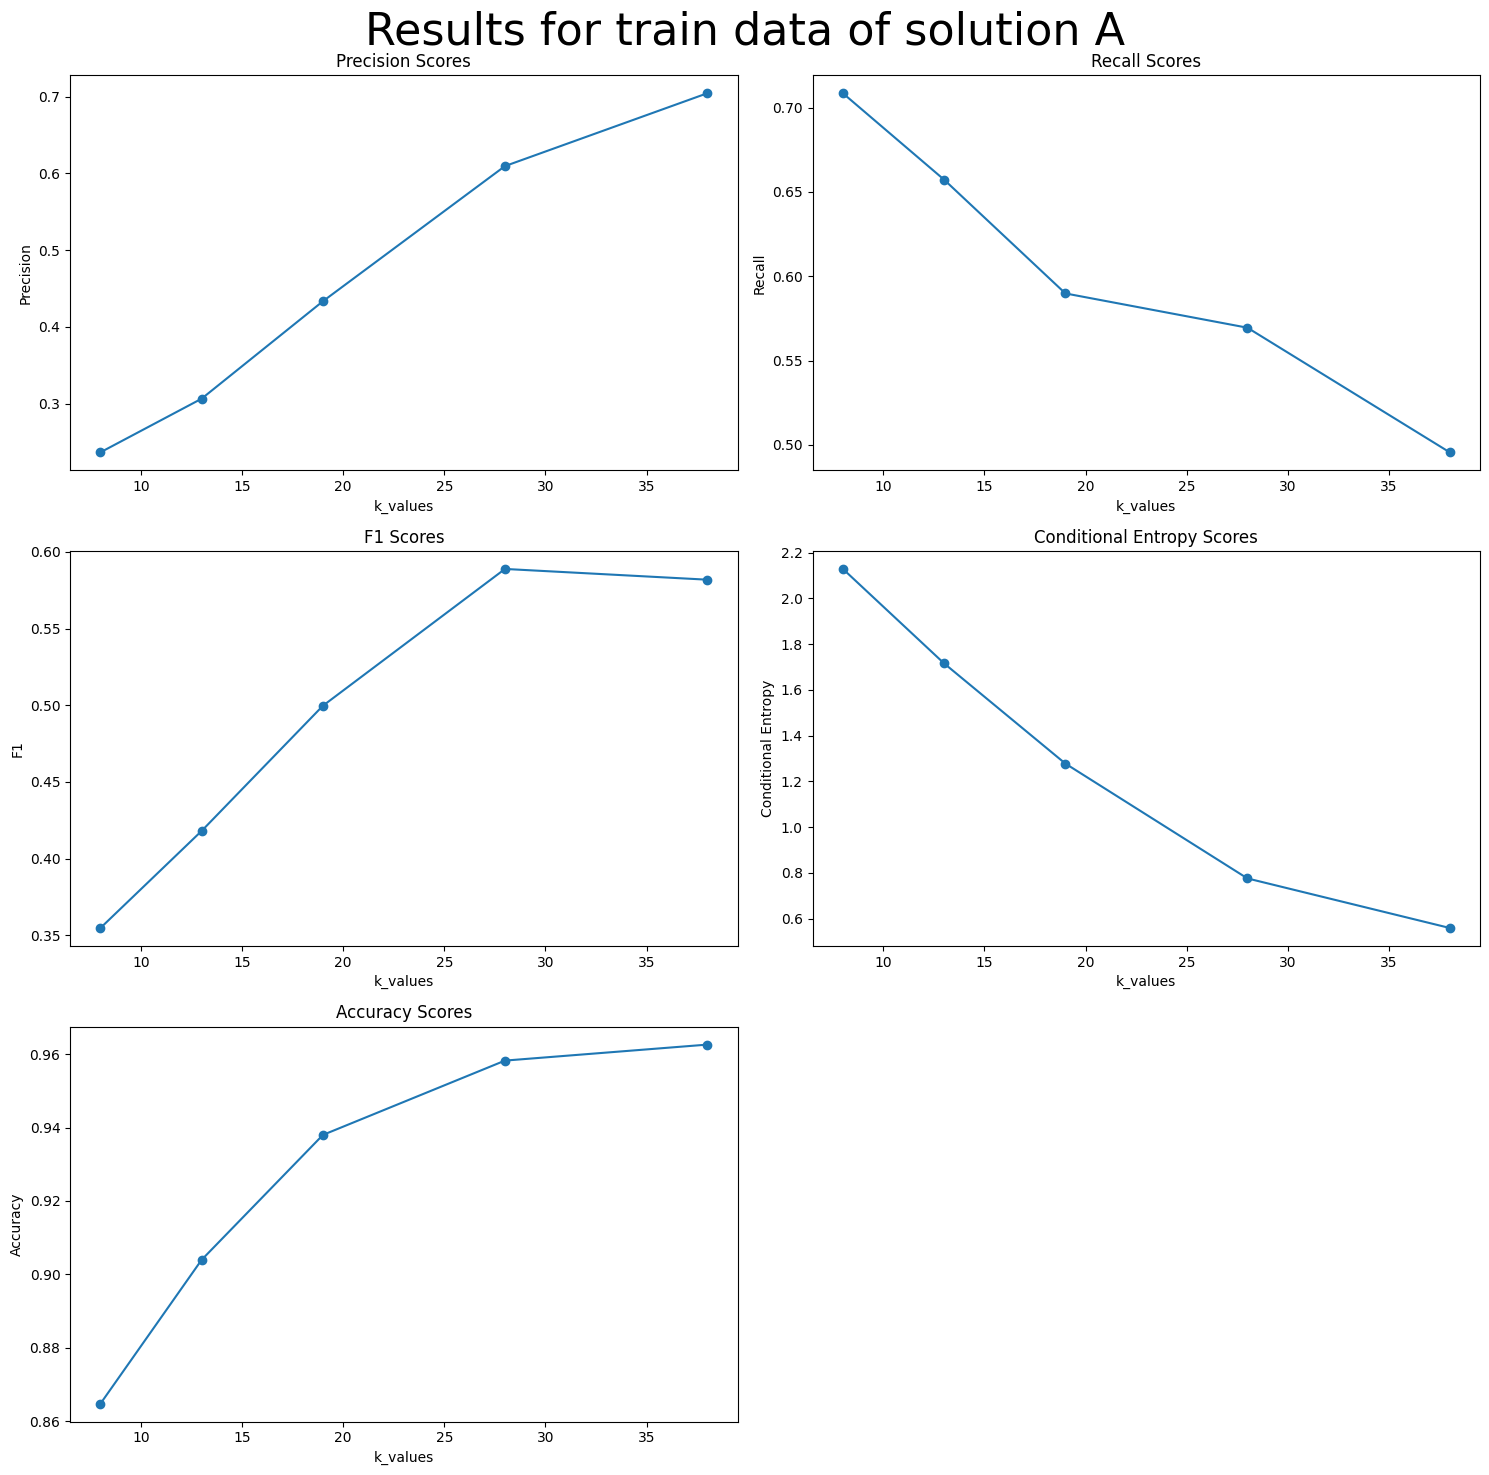

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.236739 | 0.708489 | 0.354892 |              2.12875  |   0.86477  |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.30654  | 0.657291 | 0.418095 |              1.71616  |   0.903941 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.433466 | 0.589821 | 0.499698 |              1.27795  |   0.937992 |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.609453 | 0.569497 | 0.588798 |              0.776123 |   0.958238 |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.704256 | 0.4

In [6]:
# Solution A - train
plotter_solution_a_train = Plotter(k_values, solution_a_results_train[:, 0], solution_a_results_train[:, 1], 
                                   solution_a_results_train[:, 2], solution_a_results_train[:, 3], 
                                   solution_a_results_train[:, 4], 'Results for train data of solution A')
plotter_solution_a_train.plot_scores()
plotter_solution_a_train.tabulate_scores()

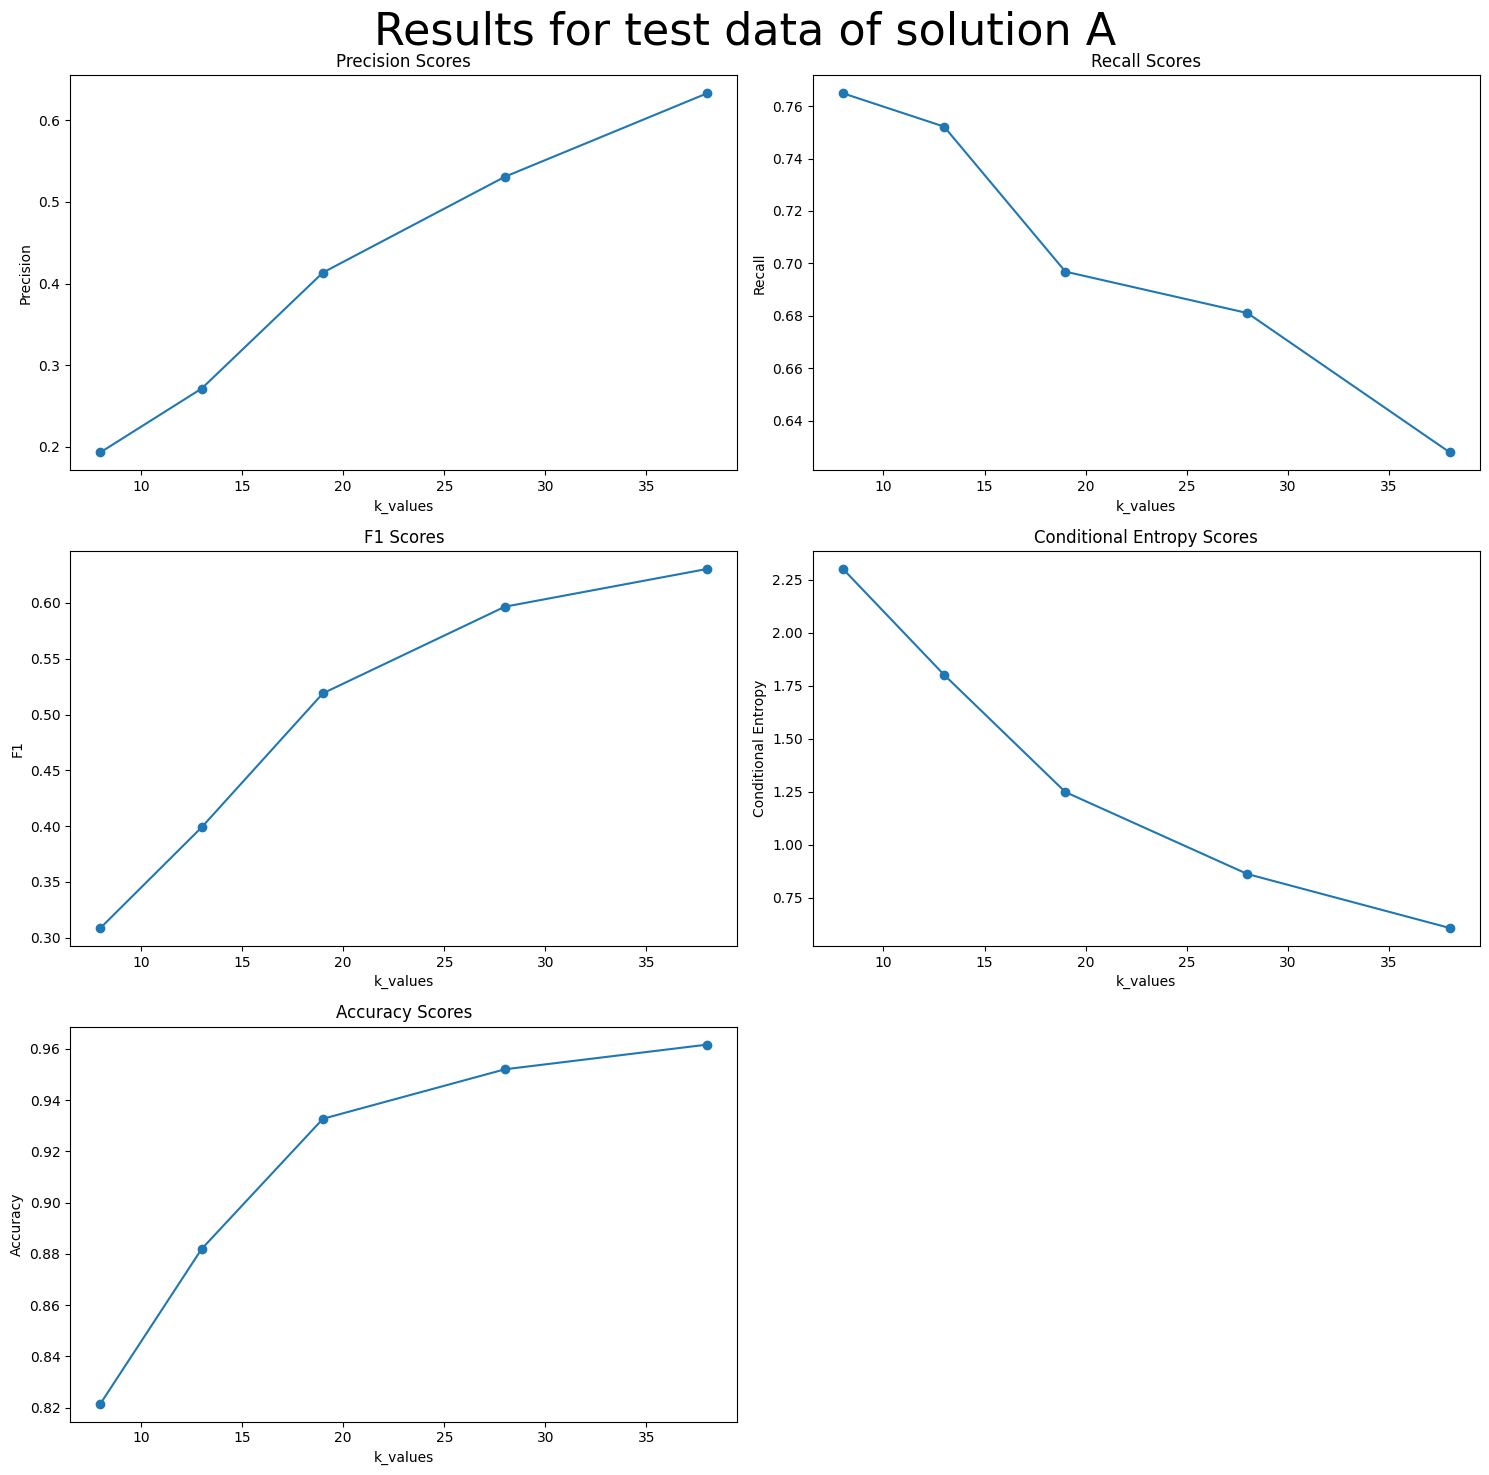

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.193442 | 0.764935 | 0.308794 |              2.30129  |   0.821544 |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.271438 | 0.752205 | 0.398923 |              1.80155  |   0.881874 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.41351  | 0.696849 | 0.519029 |              1.24796  |   0.932697 |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.530854 | 0.681036 | 0.59664  |              0.861069 |   0.952014 |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.633022 | 0.6

In [7]:
# Solution A - test
plotter_solution_a_test = Plotter(k_values, solution_a_results_test[:, 0], solution_a_results_test[:, 1],
                                   solution_a_results_test[:, 2], solution_a_results_test[:, 3],
                                   solution_a_results_test[:, 4], 'Results for test data of solution A')
plotter_solution_a_test.plot_scores()
plotter_solution_a_test.tabulate_scores()

## Solution B of data (PCA)

In [8]:
for i in range(len(k_values)):
      kmeans = KmeansClustering(k_values[i])
      kmeans.fit(x_train2)

      clusters_train_data = kmeans.predict(x_train2)
      evaluator_train = Evaluator(y_train2, clusters_train_data)

      solution_b_results_train[i, 0] = evaluator_train.compute_precision()
      solution_b_results_train[i, 1] = evaluator_train.compute_recall()
      solution_b_results_train[i, 2] = evaluator_train.compute_f1()
      solution_b_results_train[i, 3] = evaluator_train.compute_conditional_entropy()
      solution_b_results_train[i, 4] = evaluator_train.computer_accuracy()


      clusters_test_data = kmeans.predict(x_test2)
      evaluator_test = Evaluator(y_test2, clusters_test_data)

      solution_b_results_test[i, 0] = evaluator_test.compute_precision()
      solution_b_results_test[i, 1] = evaluator_test.compute_recall()
      solution_b_results_test[i, 2] = evaluator_test.compute_f1()
      solution_b_results_test[i, 3] = evaluator_test.compute_conditional_entropy()
      solution_b_results_test[i, 4] = evaluator_test.computer_accuracy()

      if k_values[i] == 19:
            evaluators.append(evaluator_train)
            evaluators_names.append("KMeans Train B")

            evaluators.append(evaluator_test)
            evaluators_names.append("KMeans Test B")

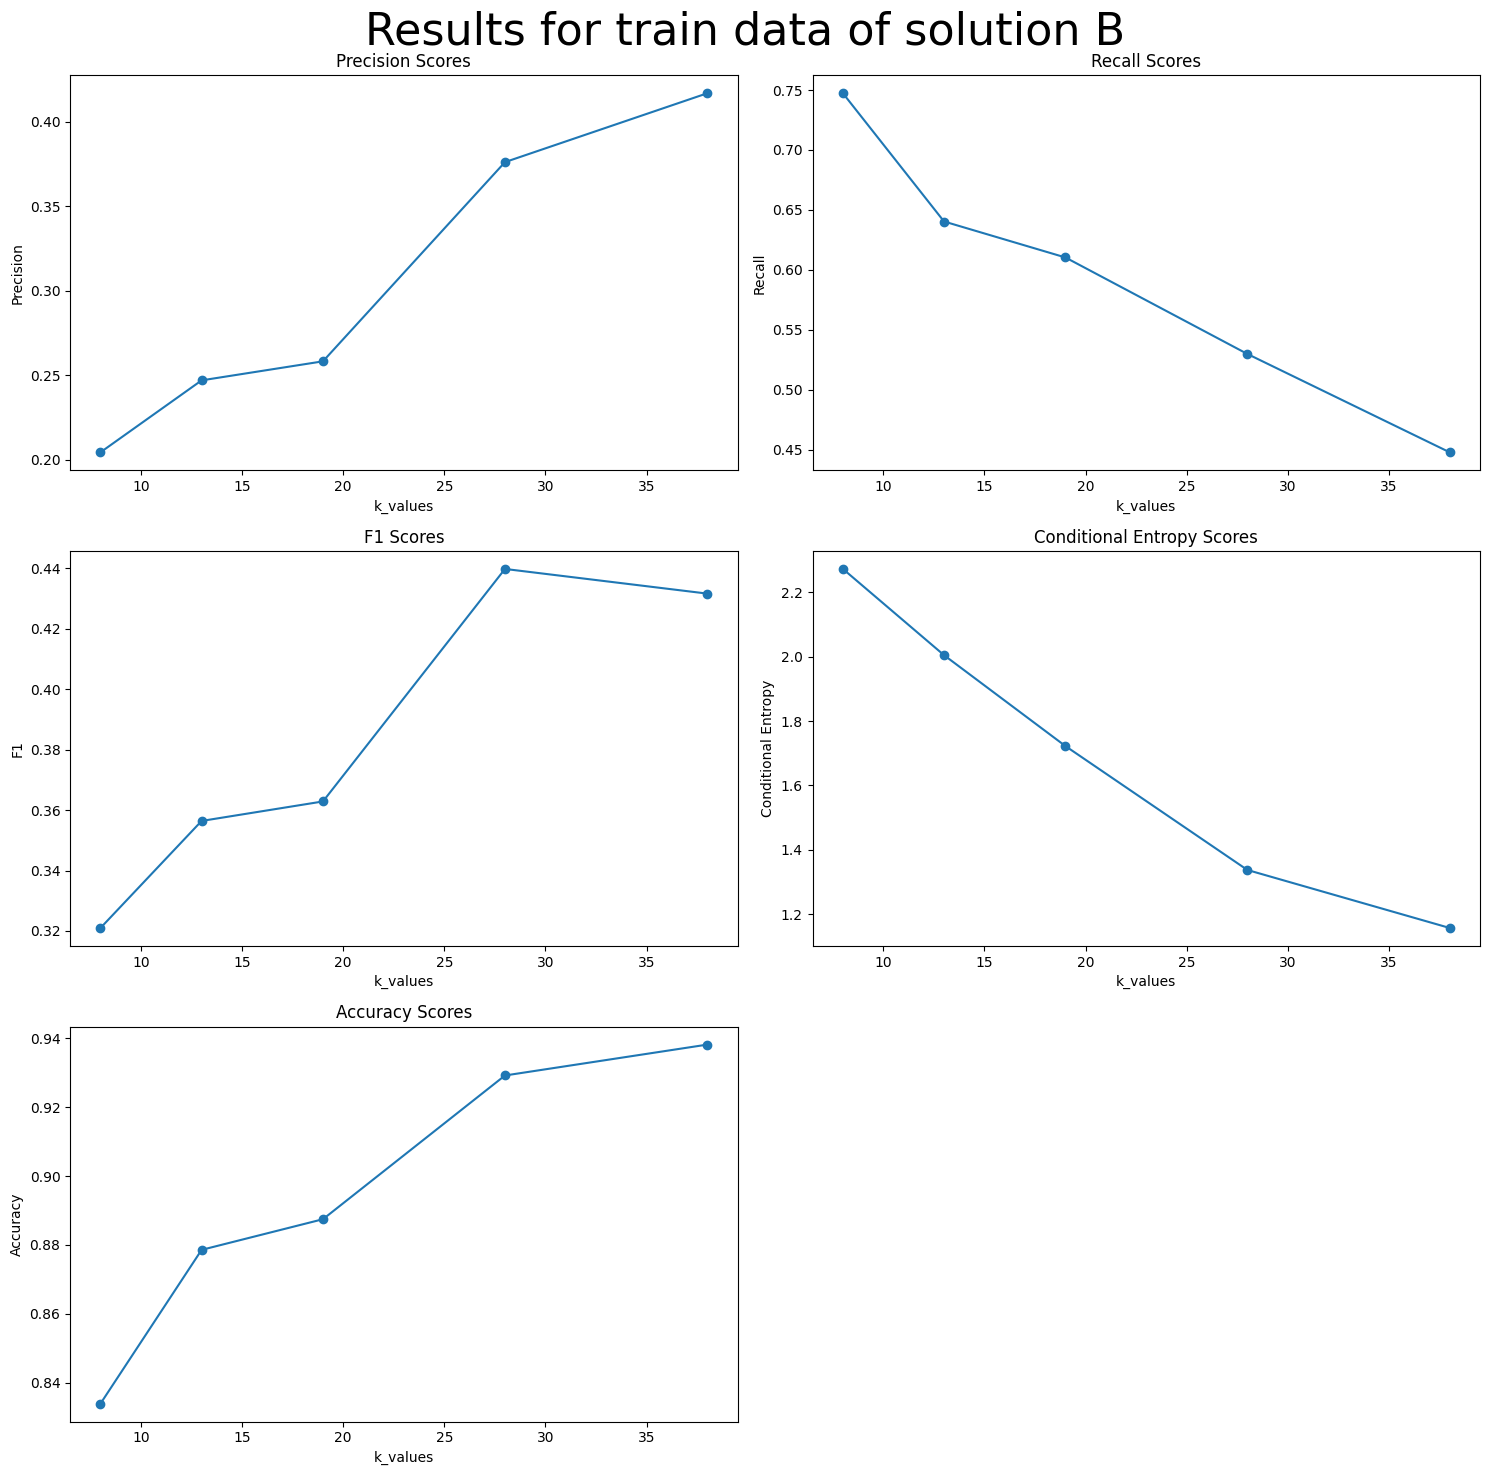

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.20438  | 0.747317 | 0.320978 |               2.27232 |   0.833997 |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.246923 | 0.640337 | 0.356409 |               2.00455 |   0.878585 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.258178 | 0.610341 | 0.362863 |               1.72234 |   0.887471 |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.375988 | 0.529802 | 0.439835 |               1.3374  |   0.92915  |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.416693 | 0.4

In [9]:
# Solution B - train
plotter_solution_b_train = Plotter(k_values, solution_b_results_train[:, 0], solution_b_results_train[:, 1],
                                   solution_b_results_train[:, 2], solution_b_results_train[:, 3],
                                   solution_b_results_train[:, 4], 'Results for train data of solution B')
plotter_solution_b_train.plot_scores()
plotter_solution_b_train.tabulate_scores()

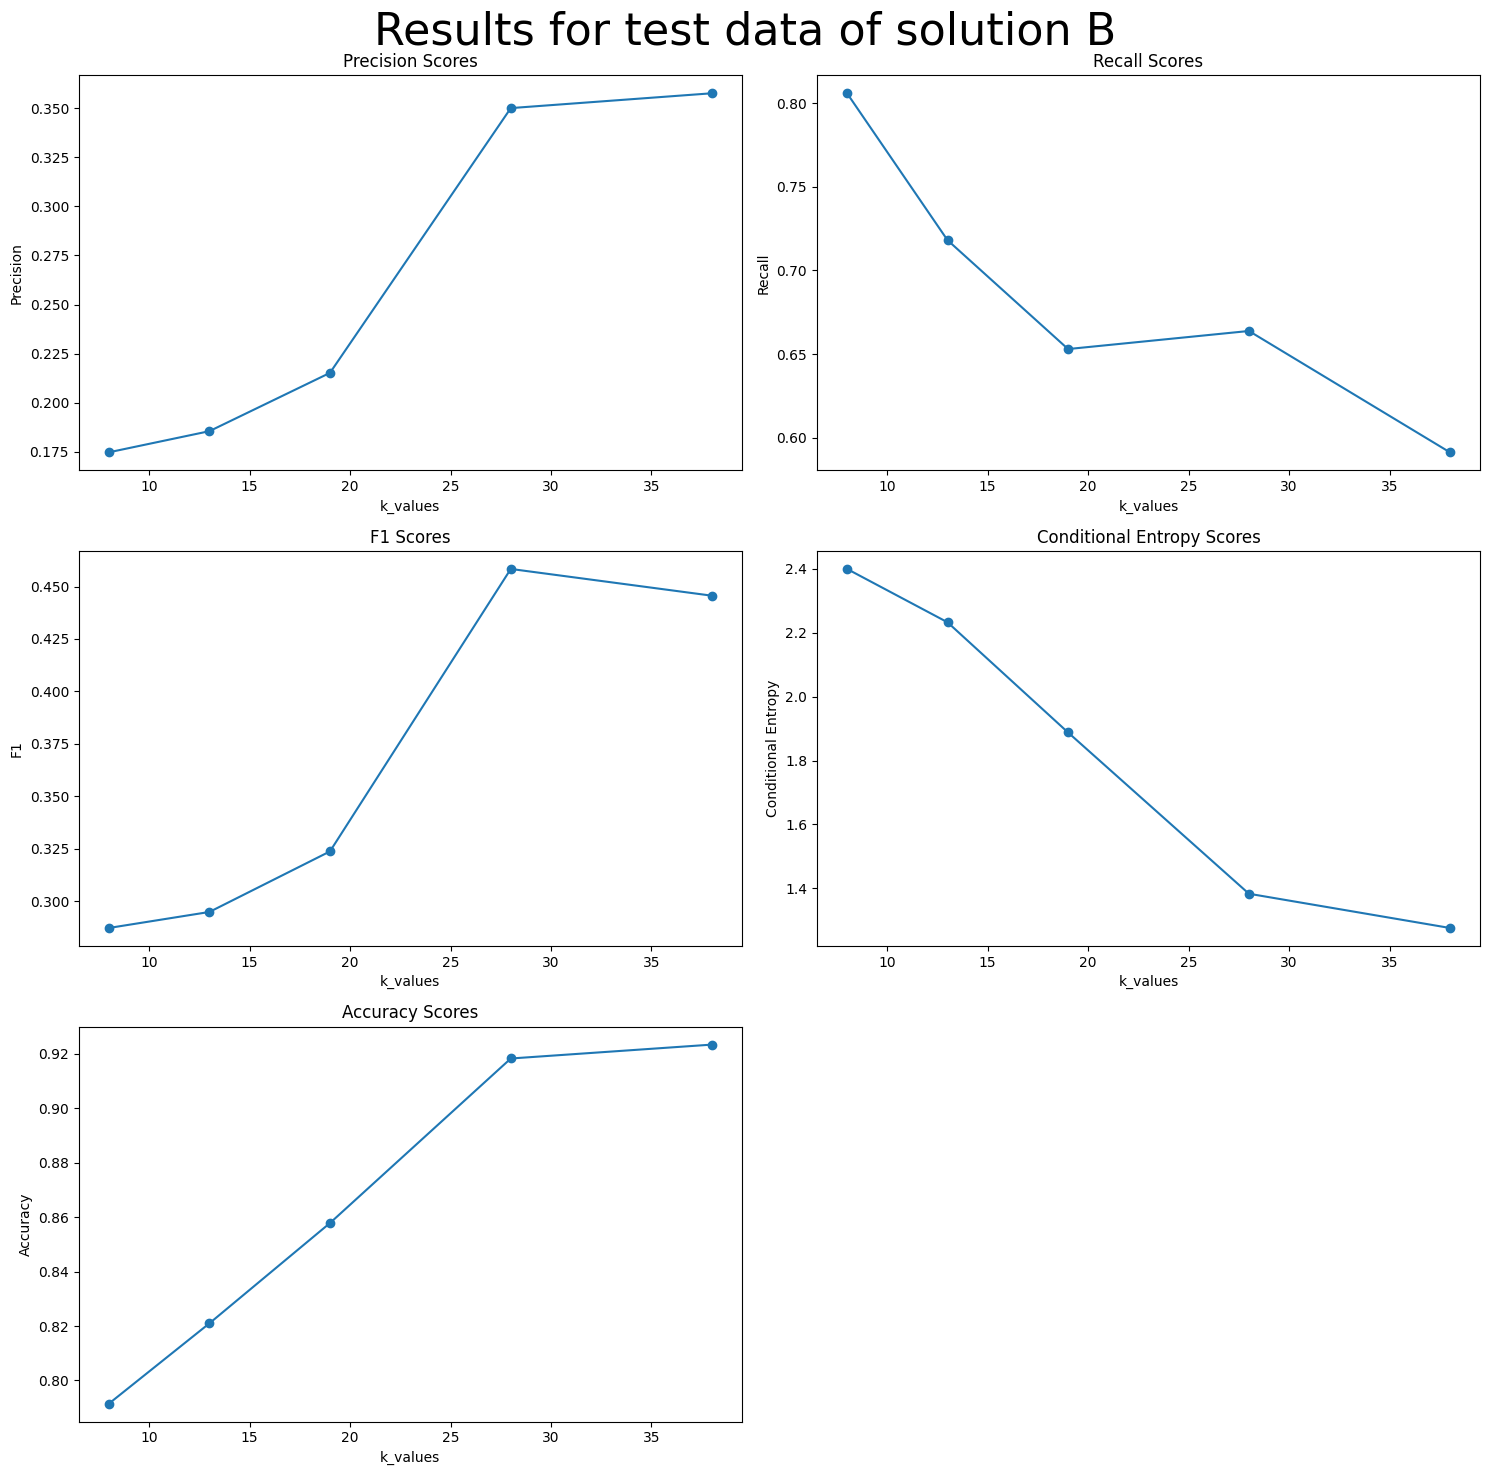

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.174723 | 0.806048 | 0.287192 |               2.39945 |   0.79149  |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.185485 | 0.718133 | 0.294821 |               2.2326  |   0.820975 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.215183 | 0.652966 | 0.323693 |               1.88783 |   0.85781  |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.35006  | 0.663781 | 0.458382 |               1.38333 |   0.918256 |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.357607 | 0.5

In [10]:
# Solution A - test
plotter_solution_b_test = Plotter(k_values, solution_b_results_test[:, 0], solution_b_results_test[:, 1],
                                  solution_b_results_test[:, 2], solution_b_results_test[:, 3],
                                  solution_b_results_test[:, 4], 'Results for test data of solution B')
plotter_solution_b_test.plot_scores()
plotter_solution_b_test.tabulate_scores()

# Spectral Clustering

Spectral clustering is a potent technique in machine learning and data mining aimed at partitioning data points into meaningful clusters based on their similarities, and by similarities we mean any similarity property that can be generated by some kernel function digging deep into the data properties. Unlike traditional clustering algorithms such as K-Means, spectral clustering is much more flexible in recognizing data clusters that have forms different from the spherical cluster form, this what makes it very powerful in finding clusters that are impossible to recognize using the previous clustering technique, K-Means.
 
Spectral clustering operates by leveraging the eigenvalues and eigenvectors of a similarity matrix derived from the dataset. It begins by constructing a similarity graph from the data points, where nodes represent data points and edges denote the strength of connections between them (similarity measure and not dissimilarity measure such as distance. Next, the Laplacian matrix of the graph is computed, encapsulating the graph's topology. Subsequently, eigenvalues and eigenvectors of the Laplacian matrix are calculated, which capture essential structural information about the data and are utilized for clustering. After performing eigen decomposition on the laplacian matrix computed, we select the smallest k-1 eigenvectors, where k denote the number of clusters specified, corresponding to the k-1 smallest eigenvalues that are non-zero. Note that through the zero eigenvalues we can know the number of strongly connected component that are present in this similarity graph.

The flexibility of spectral clustering lies in its ability to handle complex geometric structures and non-linear separations, making it suitable for diverse datasets. Moreover, spectral clustering is robust to initialization, as it is not sensitive to the initial cluster centers like K-Means. Additionally, it exhibits scalability.

Spectral clustering finds applications across various domains. It is commonly used in image segmentation to partition images into meaningful regions based on pixel similarities. In community detection, it helps identify communities or groups within social or biological networks. Furthermore, in gene expression analysis, spectral clustering is employed to cluster genes based on their expression profiles, facilitating the discovery of patterns and relationships.

Overall, spectral clustering stands as a versatile and potent technique for unsupervised learning and clustering tasks. By capitalizing on the spectral properties of data, spectral clustering can unveil hidden structures and patterns, that are not possible to recognize via other clustering techniques, making it indispensable in data analysis and exploration. In the context of our assignment on daily and sports activity detection, spectral clustering offers a promising approach to effectively cluster and identify distinct activity patterns.

<div style="text-align:center;">
 
![Spectral Clustering Algorithm Pseudocode](images/spectral_pseudo.png)
 
</div>

In [11]:
spectral_evaluators = []
spectral_evaluators_names = []

## On Solution A Dataset

In [12]:
# evaluate on train set
spectralClustering = SpectralClustering()
spectralClustering.fit(x_train)
solution_a_train_clusters_found = spectralClustering.predict()

spectral_evaluators.append(Evaluator(y_train - 1, solution_a_train_clusters_found))
spectral_evaluators_names.append("Spectral Train A")

evaluators.append(Evaluator(y_train - 1, solution_a_train_clusters_found))
evaluators_names.append("Spectral Train A")

In [13]:
# evaluate on test set
spectralClustering = SpectralClustering()
spectralClustering.fit(x_test)
solution_a_test_clusters_found = spectralClustering.predict()

spectral_evaluators.append(Evaluator(y_test - 1, solution_a_test_clusters_found))
spectral_evaluators_names.append("Spectral Test A")

evaluators.append(Evaluator(y_test - 1, solution_a_test_clusters_found))
evaluators_names.append("Spectral Test A")

## On Solution B Dataset

In [14]:
# evaluate on train set
spectralClustering = SpectralClustering()
spectralClustering.fit(x_train2)
solution_b_train_clusters_found = spectralClustering.predict()

spectral_evaluators.append(Evaluator(y_train2 - 1, solution_b_train_clusters_found))
spectral_evaluators_names.append("Spectral Train B")

evaluators.append(Evaluator(y_train2 - 1, solution_b_train_clusters_found))
evaluators_names.append("Spectral Train B")

In [15]:
# evaluate on test set
spectralClustering = SpectralClustering()
spectralClustering.fit(x_test2)
solution_b_test_clusters_found = spectralClustering.predict()

spectral_evaluators.append(Evaluator(y_test2 - 1, solution_b_test_clusters_found))
spectral_evaluators_names.append("Spectral Test B")

evaluators.append(Evaluator(y_test2 - 1, solution_b_test_clusters_found))
evaluators_names.append("Spectral Test B")

## Results

+------------------+-------------+----------+------------+-----------------------+------------+
| Model Name       |   Precision |   Recall |   F1-Score |   Conditional Entropy |   Accuracy |
+==================+=============+==========+============+=======================+============+
| Spectral Train A |    0.144296 | 0.385587 |   0.210004 |               2.32249 |   0.819128 |
+------------------+-------------+----------+------------+-----------------------+------------+
| Spectral Test A  |    0.186352 | 0.457127 |   0.264769 |               2.0681  |   0.864864 |
+------------------+-------------+----------+------------+-----------------------+------------+
| Spectral Train B |    0.157302 | 0.314078 |   0.209619 |               2.59133 |   0.854995 |
+------------------+-------------+----------+------------+-----------------------+------------+
| Spectral Test B  |    0.18407  | 0.275779 |   0.22078  |               2.45898 |   0.897058 |
+------------------+-------------+------

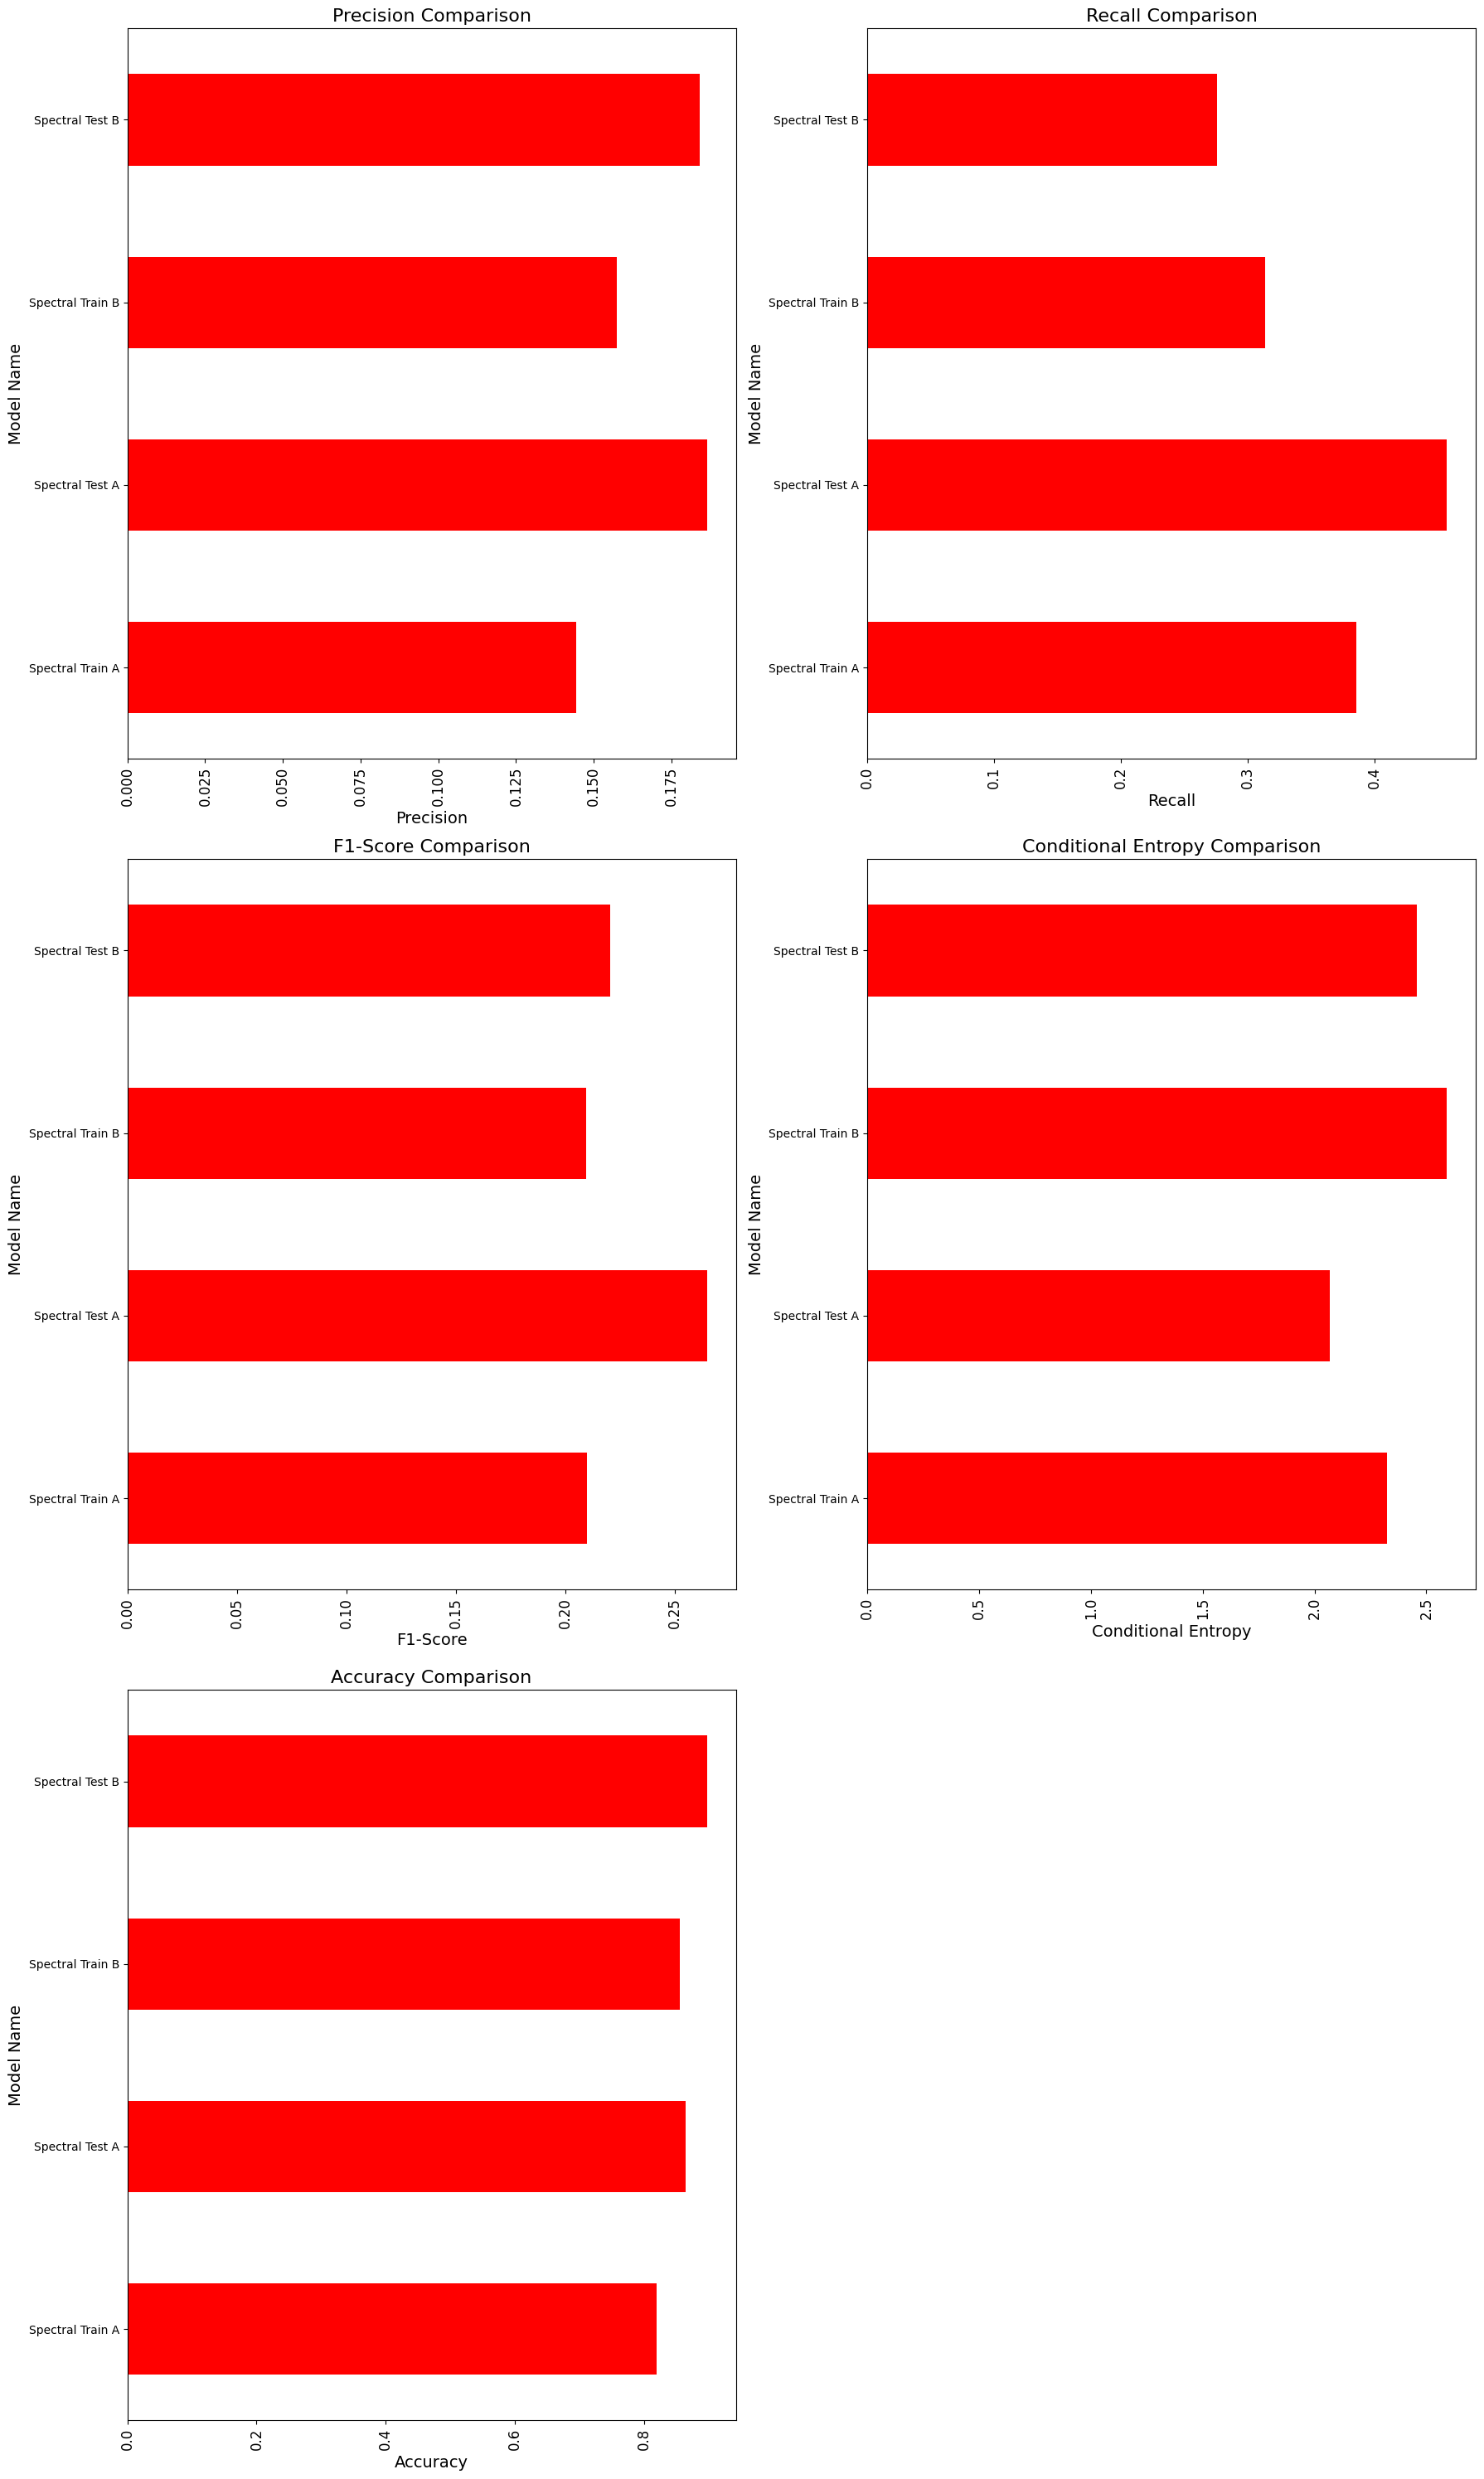

In [16]:
show_evaluation(spectral_evaluators, spectral_evaluators_names)

# DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a popular clustering algorithm widely used in data mining and machine learning. Unlike traditional clustering algorithms like K-Means, which require a predefined number of clusters, DBSCAN is capable of discovering clusters of arbitrary shapes and sizes in the data without prior knowledge of the number of clusters. It operates by partitioning the dataset into regions of high density separated by regions of low density, thereby effectively identifying clusters while also being robust to noise and outliers.

DBSCAN defines clusters as dense regions of data points separated by sparser regions. The algorithm classifies data points into three categories: core points, border points, and noise points. A core point is a data point that has a sufficient number of neighboring points within a specified distance (eps). Border points are not dense enough to be considered core points but lie within the neighborhood of a core point. Noise points, also known as outliers, are data points that do not belong to any cluster. By iteratively exploring the neighborhood of each core point, DBSCAN constructs clusters by connecting core points and merging them into larger clusters while assigning border points to the corresponding clusters. This approach enables DBSCAN to handle datasets with varying densities and effectively capture complex cluster structures, making it a valuable tool in various applications, including spatial data analysis, image processing, and anomaly detection.

<div style="text-align:center;">
 
![DBSCAN Algorithm Pseudocode](images/dbscan_pseudo.png)
 
</div>

In [17]:
dbscan_evaluators = []
dbscan_evaluators_names = []

## On Solution A Dataset

In [18]:
# evaluate on train set
dbscan = DBSCAN(eps=2.1, min_samples=40)
solution_a_train_clusters_found_dbscan = filter_dbscan_clusters(dbscan.fit(x_train))

dbscan_evaluators.append(Evaluator(y_train-1, solution_a_train_clusters_found_dbscan))
dbscan_evaluators_names.append("DBSCAN Train A")

evaluators.append(Evaluator(y_train-1, solution_a_train_clusters_found_dbscan))
evaluators_names.append("DBSCAN Train A")

In [19]:
# evaluate on test set
dbscan = DBSCAN(eps=2.1, min_samples=40)
solution_a_test_clusters_found_dbscan = filter_dbscan_clusters(dbscan.fit(x_test))

dbscan_evaluators.append(Evaluator(y_test-1, solution_a_test_clusters_found_dbscan))
dbscan_evaluators_names.append("DBSCAN Test A")

evaluators.append(Evaluator(y_test-1, solution_a_test_clusters_found_dbscan))
evaluators_names.append("DBSCAN Test A")

## On Solution B Dataset

In [20]:
# evaluate on train set
dbscan = DBSCAN(eps=125, min_samples=40)
solution_b_train_clusters_found_dbscan = filter_dbscan_clusters(dbscan.fit(x_train2))

dbscan_evaluators.append(Evaluator(y_train2-1, solution_b_train_clusters_found_dbscan))
dbscan_evaluators_names.append("DBSCAN Train B")

evaluators.append(Evaluator(y_train2-1, solution_b_train_clusters_found_dbscan))
evaluators_names.append("DBSCAN Train B")

In [21]:
# evaluate on test set
dbscan = DBSCAN(eps=125, min_samples=40)
solution_b_test_clusters_found_dbscan = filter_dbscan_clusters(dbscan.fit(x_test2))

dbscan_evaluators.append(Evaluator(y_test2-1, solution_b_test_clusters_found_dbscan))
dbscan_evaluators_names.append("DBSCAN Test B")

evaluators.append(Evaluator(y_test2-1, solution_b_test_clusters_found_dbscan))
evaluators_names.append("DBSCAN Test B")

## Results

+----------------+-------------+----------+------------+-----------------------+------------+
| Model Name     |   Precision |   Recall |   F1-Score |   Conditional Entropy |   Accuracy |
+================+=============+==========+============+=======================+============+
| DBSCAN Train A |    0.986923 | 0.268509 |   0.422161 |             0.030159  |   0.961409 |
+----------------+-------------+----------+------------+-----------------------+------------+
| DBSCAN Test A  |    0.952624 | 0.370637 |   0.533648 |             0.0536024 |   0.966242 |
+----------------+-------------+----------+------------+-----------------------+------------+
| DBSCAN Train B |    0.309433 | 0.340717 |   0.324323 |             0.688771  |   0.925465 |
+----------------+-------------+----------+------------+-----------------------+------------+
| DBSCAN Test B  |    0.254309 | 0.425023 |   0.318216 |             0.847024  |   0.905092 |
+----------------+-------------+----------+------------+----

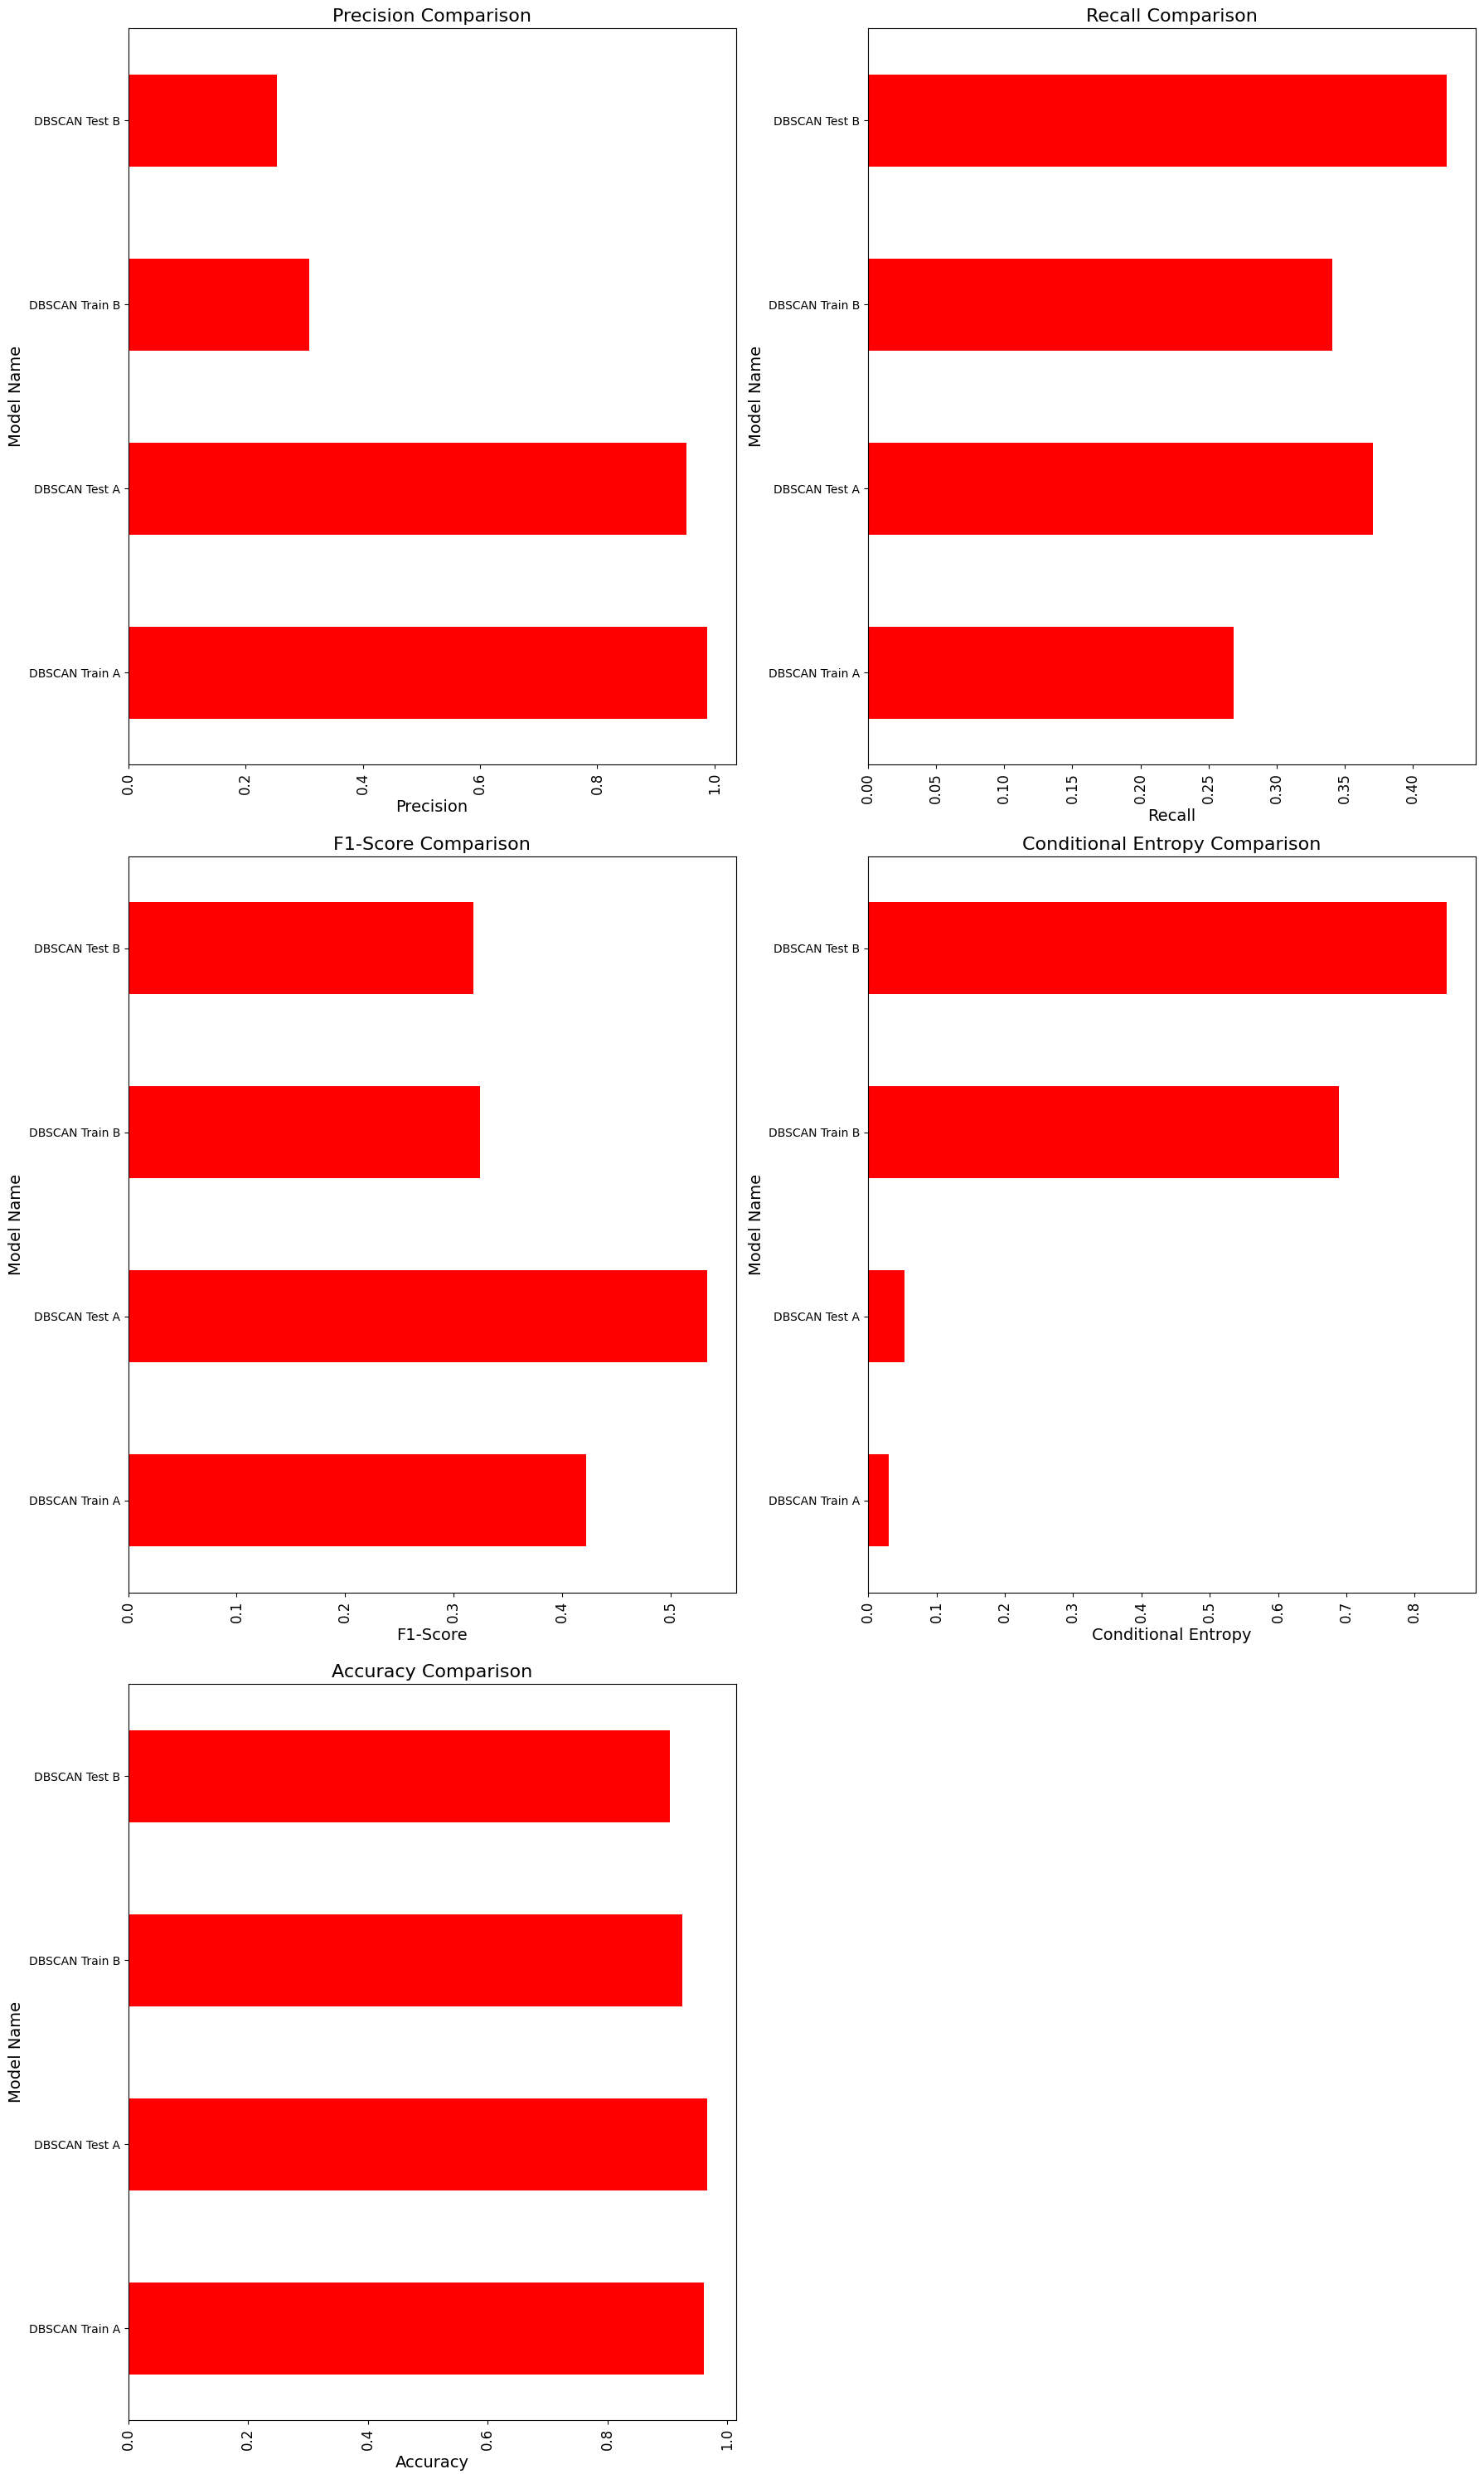

In [22]:
show_evaluation(dbscan_evaluators, dbscan_evaluators_names)

# Results and Analysis

+------------------+-------------+----------+------------+-----------------------+------------+
| Model Name       |   Precision |   Recall |   F1-Score |   Conditional Entropy |   Accuracy |
+==================+=============+==========+============+=======================+============+
| KMeans - Train A |    0.433466 | 0.589821 |   0.499698 |             1.27795   |   0.937992 |
+------------------+-------------+----------+------------+-----------------------+------------+
| KMeans - Test A  |    0.41351  | 0.696849 |   0.519029 |             1.24796   |   0.932697 |
+------------------+-------------+----------+------------+-----------------------+------------+
| KMeans Train B   |    0.258178 | 0.610341 |   0.362863 |             1.72234   |   0.887471 |
+------------------+-------------+----------+------------+-----------------------+------------+
| KMeans Test B    |    0.215183 | 0.652966 |   0.323693 |             1.88783   |   0.85781  |
+------------------+-------------+------

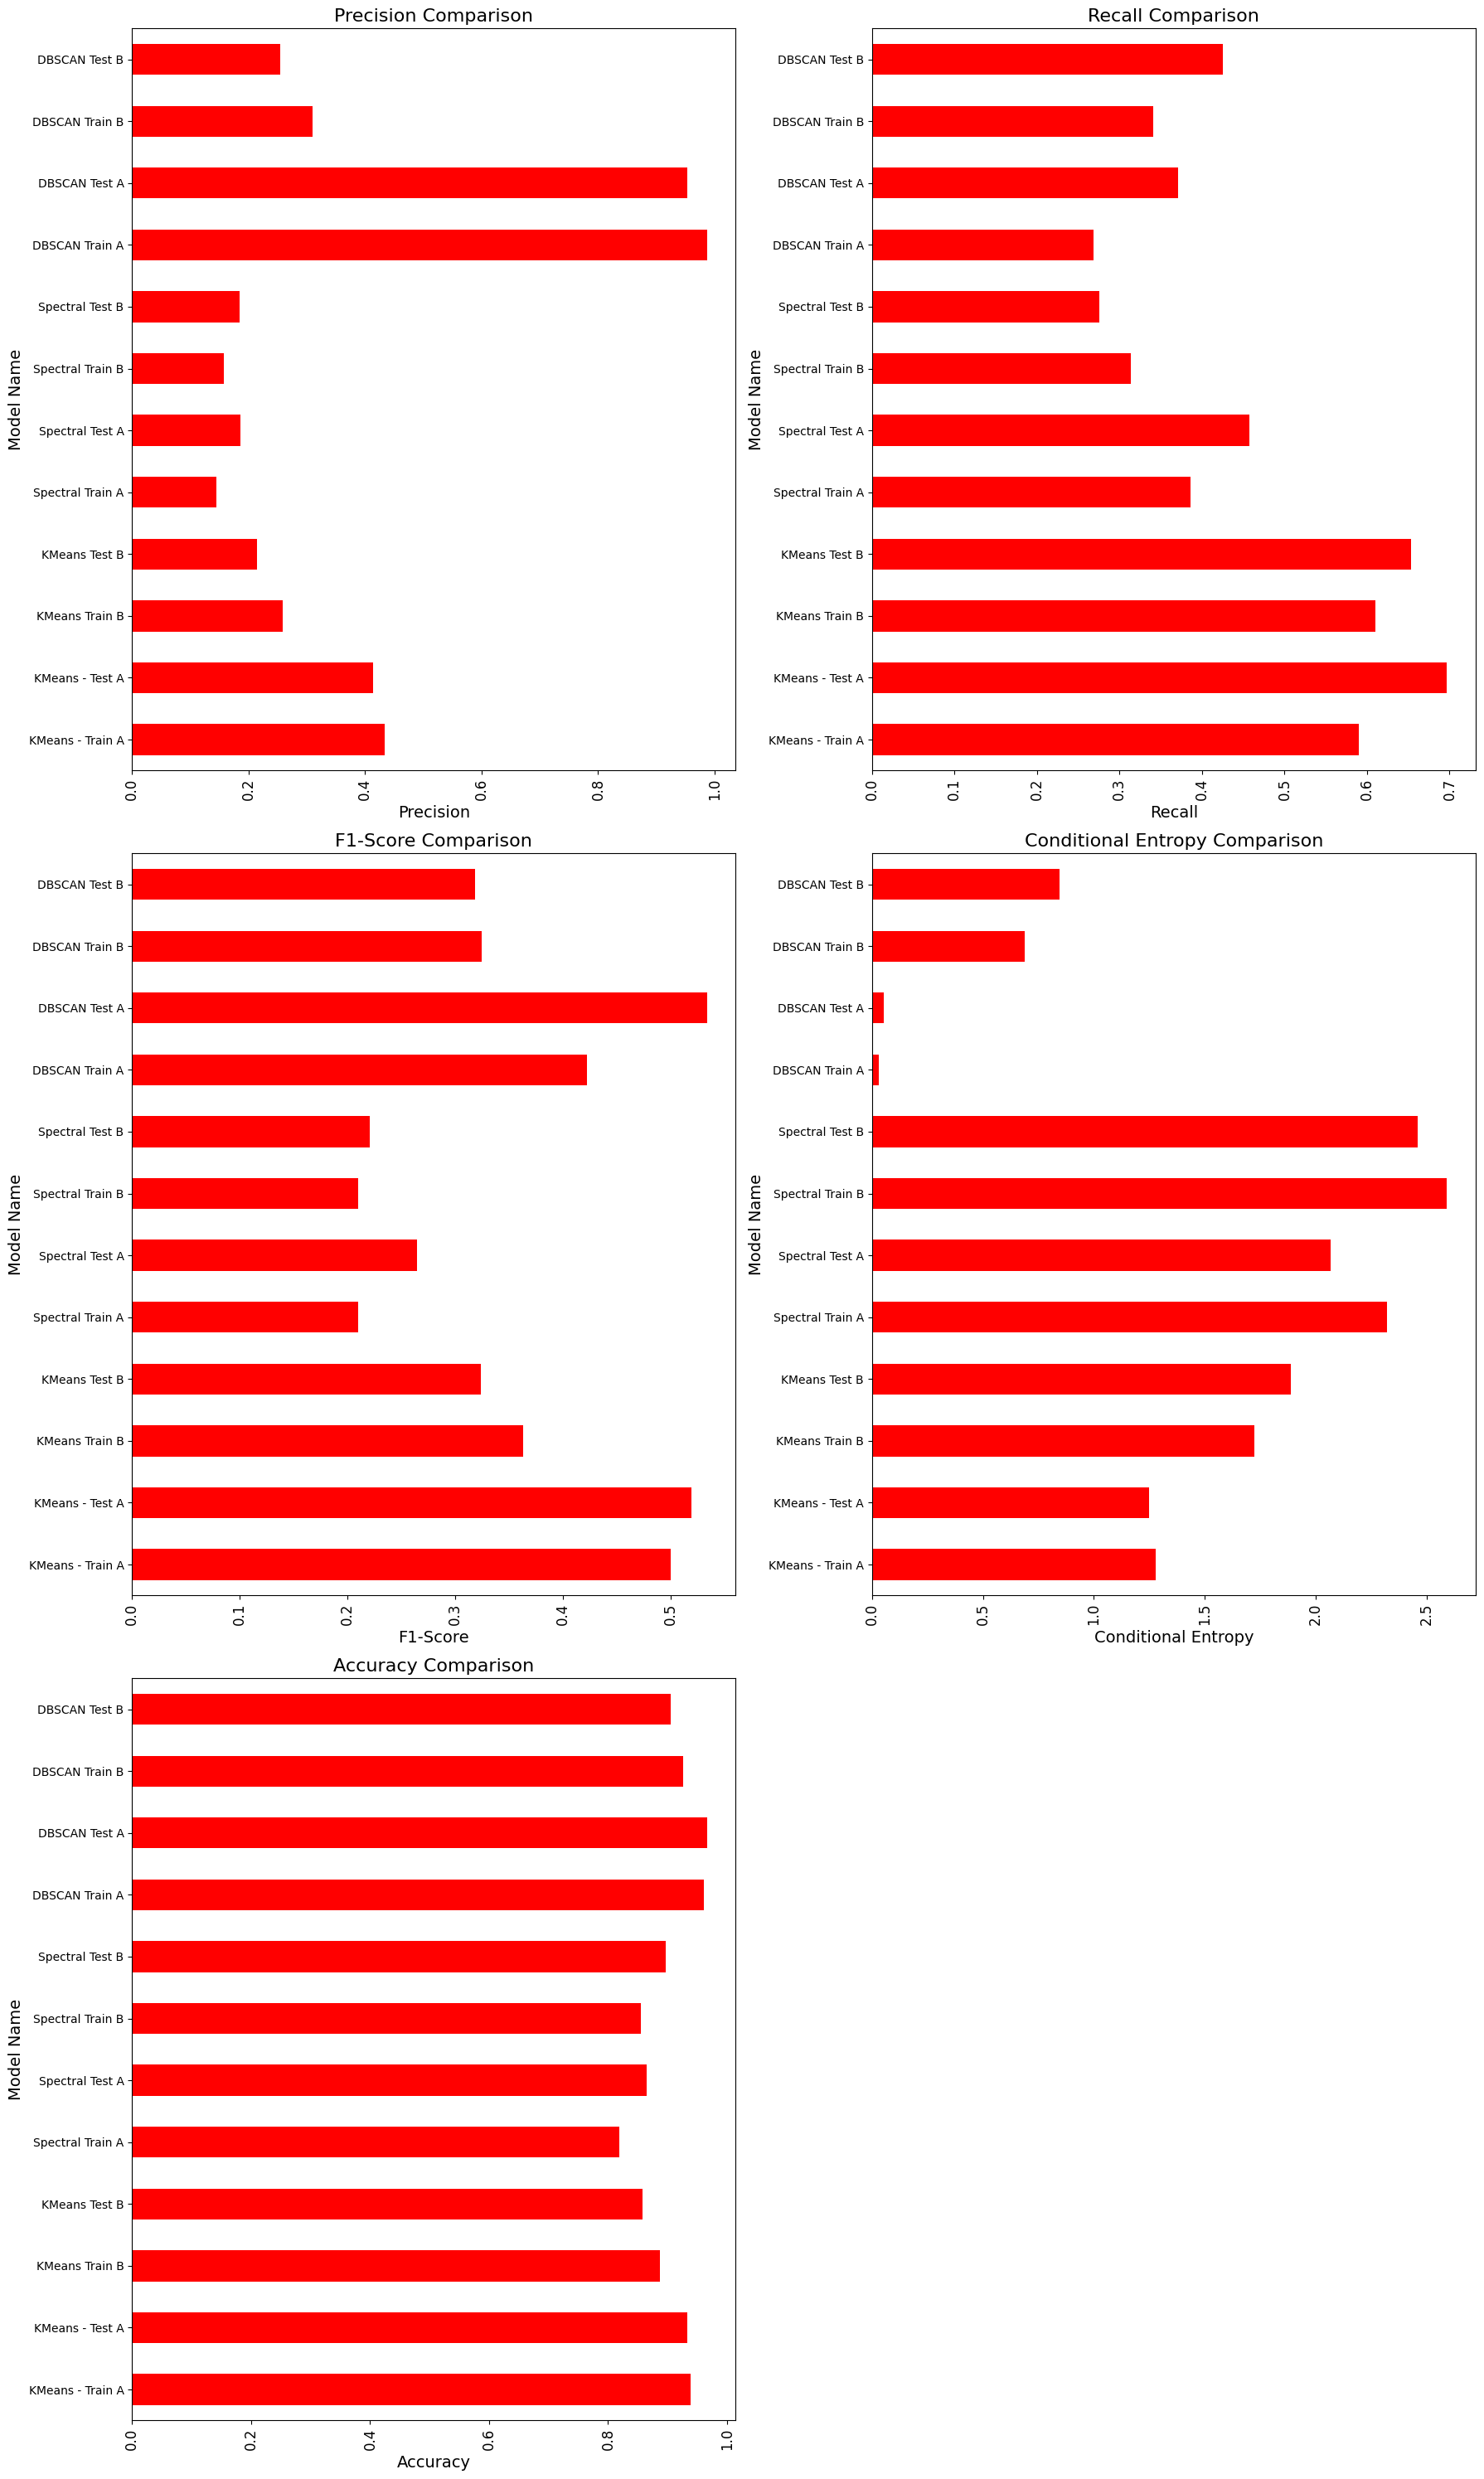

In [23]:
show_evaluation(evaluators, evaluators_names)

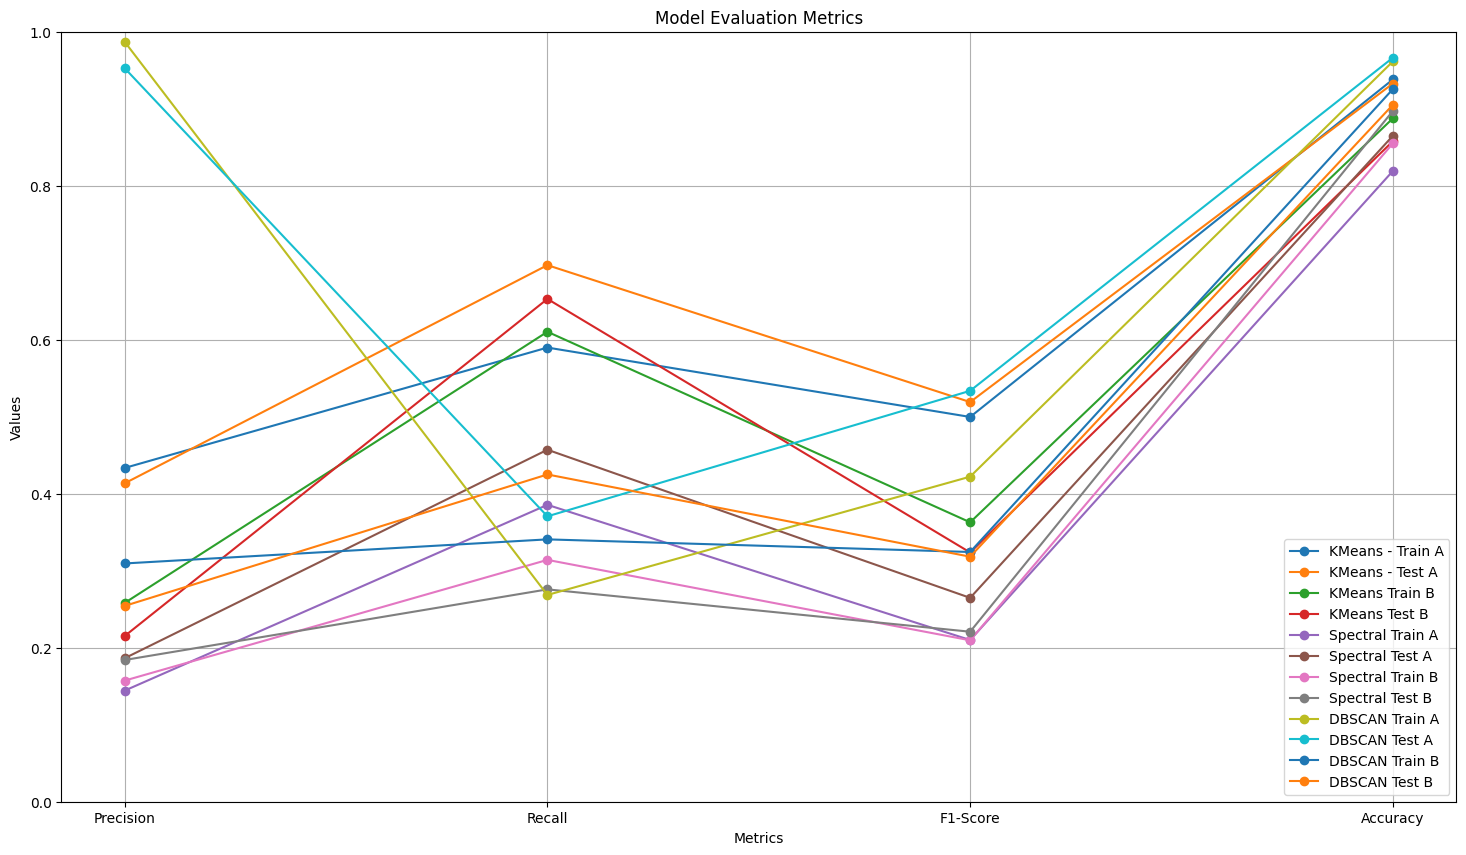

In [24]:
plot_summary(evaluators, evaluators_names)

## Discussion

In this assignment, we evaluated the performance of three clustering algorithms: KMeans, Spectral Clustering, and DBSCAN, on two different solutions (different versions of the dataset based on the preprocessing done on it) labeled as Solution A and Solution B. The evaluation metrics used include precision, recall, F1-score, conditional entropy, and accuracy.

**KMeans**
KMeans algorithm, known for its simplicity and efficiency, was employed to cluster the data into distinct groups. For both Solution A and Solution B, KMeans achieved moderate performance. In Solution A, KMeans achieved precision of approximately 0.41 and recall of around 0.70 on the test set. However, in Solution B, the precision dropped to about 0.22, indicating lower effectiveness in correctly identifying true positives. This reduction in precision and other metrics suggests that KMeans struggled to separate the data into meaningful clusters in Solution B, which had greater number of dimensions (over 600 dimension per sample).

**Spectral Clustering**
Spectral Clustering, a method based on graph theory and linear algebra, was utilized to partition the data. Results indicate that Spectral Clustering performed relatively poorly compared to KMeans. In both solutions, the precision, recall, and F1-score achieved by Spectral Clustering were notably lower than those of KMeans. This suggests that Spectral Clustering struggled to capture the underlying structure of the data effectively. 

**DBSCAN**
DBSCAN, a density-based clustering algorithm, was applied to group the data points. In Solution A, DBSCAN exhibited exceptional performance with precision close to 0.95 and recall around 0.37 on the test set. These high values suggest that DBSCAN successfully identified the clusters with minimal false positives and negatives. However, in Solution B, the performance of DBSCAN notably declined, with precision dropping to approximately 0.25. This decline indicates that DBSCAN struggled to identify meaningful clusters in Solution B, which is the version of the dataset having large number of features.

**Overall Analysis**
The varying performance of the clustering algorithms across different solutions can be attributed to the nature of the data and the characteristics of each algorithm. KMeans, being sensitive to initial cluster centers, may have struggled with Solution B, which possibly has more complex or less separable clusters due to the large number of features per sample. Spectral Clustering relies heavily on the choice of affinity matrix and the number of eigenvectors used, which might not have been optimal for the given datasets. DBSCAN, being a density-based algorithm, is sensitive to its parameters, such as epsilon and minimum points, which may have been suboptimal for Solution B.

In conclusion, the choice of clustering algorithm and its parameters should be carefully considered based on the characteristics of the data and the desired outcome. Further experimentation and fine-tuning may be necessary to achieve optimal clustering results for different datasets and scenarios. However, our focus in this assignment was not on fine-tuning models, but it was one exploring and implementing different unsupervised clustering algorithms and evaluating their performance on a real-life dataset. Also, this assignment we had an objective of implementing the evaluation metrics computation algorithms efficiently, that is, we didn't use a 3rd-party library that implements the evaluation metrics computation algorithms.

# References and Resources

1. [PEP 8 Style guide for python code - Module Names](https://peps.python.org/pep-0008/#package-and-module-names)